SNA Project Round - 1 

Team: TekloTekloTingTiiiing

Members: 

1) 21ucs204 - Sindhi Krish Kamal
2) 21ucs158 - Prashant Singh Shekhawat
3) 21ucs237 - Yashodhan Sonune
4) 21ucs183 - Sarvagya Acharya

Datasets chosen:
- US Power Grid ( http://konect.cc/networks/opsahl-powergrid/ )
- Yeast network ( http://konect.cc/networks/moreno_propro/ )


In [338]:
#importing all the important libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import numpy as np


In [339]:
#Function to load the undirected datasets
def load_Undirected_Graph(file_path):
    """
    Load dataset from file path
    """
    # Depending on the format of your dataset, you might need to adjust the loading method
    # For example, if it's an edgelist, you can use nx.read_edgelist()
    G = nx.read_edgelist(file_path)
    return G

In [340]:
# Function to summarize network statistics
def summarize_network_stats(G):
    """
    Summarize network statistics
    """
    # Degree distribution
    degrees = dict(G.degree())
    degree_values = list(degrees.values())
    max_degree = max(degree_values)
    min_degree = min(degree_values)
    avg_degree = sum(degree_values) / len(G)
    std_degree = pd.Series(degree_values).std()

    #Plot degree distribution
    plt.bar(degrees.keys(), degrees.values() ,color='skyblue')
    plt.ylim(0, 150)
    plt.title("Degree Distribution")
    plt.xlabel("Node_ID")
    plt.ylabel("Degree")
    plt.show()

    # Plot kernel density estimation (KDE) plot of node degree
    sns.kdeplot(degree_values, color='skyblue', fill=True)
    plt.xlim(0, 150)
    plt.xlabel('Degree')
    plt.ylabel('Density')
    plt.title('Node Degree Distribution (KDE plot)')
    plt.show()

    # Output statistics
    print("Max Degree:", max_degree)
    print("Min Degree:", min_degree)
    print("Average Degree:", avg_degree)
    print("Standard Deviation of Degree Distribution:", std_degree)
    print("Total number of Nodes in the graph:", G.number_of_nodes())
    print("Total number of Edges in the graph:", G.number_of_edges())



In [341]:
# Function to calculate centrality measures
def calculate_centrality_measures(G):
    """
    Calculate centrality measures
    """
    # Degree centrality
    degree_centrality = nx.degree_centrality(G)
    print("Degree Centrality:")
    print(degree_centrality)
    rounded_degree_centrality = np.round(list(degree_centrality.values()), 5)
    print(rounded_degree_centrality)
    # Plot histogram of degree centrality
    plt.hist(rounded_degree_centrality, bins=1000, color='skyblue')
    plt.xlim(0, 0.01)
    plt.ylim(0, 300)
    plt.title("Degree Centrality Distribution")
    plt.xlabel("Degree Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Plot node ID versus degree centrality
    plt.scatter(list(degree_centrality.keys()), list(degree_centrality.values()), color='black', alpha=0.5)
    plt.ylim(0, 0.01)
    plt.title("Node ID vs Degree Centrality")
    plt.xlabel("Node ID")
    plt.ylabel("Degree Centrality")
    plt.show()

    # Eigenvector centrality
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    print("\nEigenvector Centrality:")
    print(eigenvector_centrality)

    # Plot histogram of eigenvector centrality
    plt.hist(eigenvector_centrality.values(), bins=10000, color='skyblue')
    plt.xlim(0, 0.04)
    plt.title("Eigenvector Centrality Distribution")
    plt.xlabel("Eigenvector Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Plot node ID versus eigenvector centrality
    plt.scatter(list(eigenvector_centrality.keys()), list(eigenvector_centrality.values()), color='black', alpha=0.5)
    plt.ylim(0, 0.2)
    plt.title("Node ID vs Eigenvector Centrality")
    plt.xlabel("Node ID")
    plt.ylabel("Eigenvector Centrality")
    plt.show()

    # Katz centrality
    katz_centrality = nx.katz_centrality_numpy(G, alpha=0.1)
    print("\nKatz Centrality:")
    print(katz_centrality)

    # Plot histogram of Katz centrality
    plt.hist(katz_centrality.values(), bins=10000, color='skyblue')
    plt.xlim(0, 0.06)
    plt.title("Katz Centrality Distribution")
    plt.xlabel("Katz Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Plot node ID versus Katz centrality
    plt.scatter(list(katz_centrality.keys()), list(katz_centrality.values()), color='black', alpha=0.5)
    plt.ylim(0, 0.1)
    plt.title("Node ID vs Katz Centrality")
    plt.xlabel("Node ID")
    plt.ylabel("Katz Centrality")
    plt.show()

    # PageRank centrality
    pagerank_centrality = nx.pagerank(G)
    print("\nPageRank Centrality:")
    print(pagerank_centrality)

    # Plot histogram of PageRank centrality
    plt.hist(pagerank_centrality.values(), bins=10000, color='skyblue')
    plt.xlim(0, 0.0004)
    plt.title("PageRank Centrality Distribution")
    plt.xlabel("PageRank Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Plot node ID versus PageRank centrality
    plt.scatter(list(pagerank_centrality.keys()), list(pagerank_centrality.values()), color='black', alpha=0.5)
    plt.ylim(0, 0.0004)
    plt.title("Node ID vs PageRank Centrality")
    plt.xlabel("Node ID")
    plt.ylabel("PageRank Centrality")
    plt.show()

    # Clustering coefficients
    local_clustering = nx.clustering(G)
    global_clustering = nx.average_clustering(G)
    print("\nLocal Clustering Coefficients:")
    print(local_clustering)
    print("\nGlobal Clustering Coefficient:")
    print(global_clustering)

    # Plot histogram of local clustering coefficients
    plt.hist(local_clustering.values(), bins=10000, color='skyblue')
    plt.xlim(0, 0.1)
    plt.ylim(0, 20)
    plt.title("Local Clustering Coefficients Distribution")
    plt.xlabel("Local Clustering Coefficients")
    plt.ylabel("Frequency")
    plt.show()
    
    # Plot node ID versus local clustering centrality
    plt.scatter(list(local_clustering.keys()), list(local_clustering.values()), color='black', alpha=0.5)
    plt.ylim(0, 0.1)
    plt.title("Node ID vs Local Clustering Centrality")
    plt.xlabel("Node ID")
    plt.ylabel("Local Clustering Centrality")
    plt.show()

    # Betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G, k = 1000)
    print("\nBetweenness Centrality:")
    print(betweenness_centrality)

    # Plot histogram of betweenness centrality
    plt.hist(betweenness_centrality.values(), bins=10000, color='skyblue')
    plt.xlim(0, 0.003)
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Betweenness Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Plot node ID versus betweenness centrality
    plt.scatter(list(betweenness_centrality.keys()), list(betweenness_centrality.values()), color='black', alpha=0.5)
    plt.ylim(0, 0.003)
    plt.title("Node ID vs Betweenness Centrality")
    plt.xlabel("Node ID")
    plt.ylabel("Betweenness Centrality")
    plt.show()

    # Closeness centrality
    closeness_centrality = nx.closeness_centrality(G)
    print("\nCloseness Centrality:")
    print(closeness_centrality)

    # Plot histogram of closeness centrality
    plt.hist(closeness_centrality.values(), bins=10000, color='skyblue')
    plt.xlim(0, 0.5)
    plt.title("Closeness Centrality Distribution")
    plt.xlabel("Closeness Centrality")
    plt.ylabel("Frequency")
    plt.show()

    # Plot node ID versus closeness centrality
    plt.scatter(list(closeness_centrality.keys()), list(closeness_centrality.values()), color='black', alpha=0.5)
    plt.ylim(0, 0.5)
    plt.title("Node ID vs Closeness Centrality")
    plt.xlabel("Node ID")
    plt.ylabel("Closeness Centrality")
    plt.show()

    # Reciprocity
    reciprocity = nx.reciprocity(G)
    print("\nReciprocity:")
    print(reciprocity)

    # Transitivity
    transitivity = nx.transitivity(G)
    print("\nTransitivity:")
    print(transitivity)

    return pd.DataFrame({"Degree Centrality": degree_centrality, "Eigenvector Centrality": eigenvector_centrality, "Katz Centrality": katz_centrality, "PageRank Centrality": pagerank_centrality, "Betweenness Centrality": betweenness_centrality, "Closeness Centrality": closeness_centrality})

In [342]:
def get_top_10_values(centrality_measures):
    # Function to get top N values and corresponding node IDs for each centrality measure
    def get_top_n_centrality_values(centrality_measures, top_n=10):
        top_n_values = {}
        for measure, values in centrality_measures.items():
            sorted_values = sorted(values.items(), key=lambda x: x[1], reverse=True)[:top_n]
            top_n_values[measure] = sorted_values
        return top_n_values

    # Get top 10 values for each centrality measure
    top_10_centrality_values = get_top_n_centrality_values(centrality_measures)

    # Print the top 10 values for each centrality measure
    for measure, values in top_10_centrality_values.items():
        print(f"Top 10 values for {measure}:")
        for node, centrality_value in values:
            print(f"Node: {node}, Centrality Value: {centrality_value}")
        print()

In [343]:
# def generate_BA_network():
#     # Initialize a BA network with 5 initial nodes
#     BA_network = nx.barabasi_albert_graph(10000, 5)
#     return BA_network

In [344]:
def generate_BA_network():
    def initialize_ba_network(m0, m, n):
        """
        Initialize a Barabási-Albert (BA) scale-free network.
        
        Parameters:
            - m0: Initial number of nodes in the network.
            - m: Number of edges to attach from a new node to existing nodes.
            - n: Total number of nodes desired in the network.
        
        Returns:
            - G: Barabási-Albert network with 'n' nodes.
        """
        # Initialize a complete graph with m0 nodes
        G = nx.complete_graph(m0)
        
        # Add nodes with preferential attachment
        for new_node in range(m0, n):
            # Select m nodes to attach to the new node
            targets = list(range(new_node))
            selected_nodes = []
            for _ in range(m):
                if targets:
                    node = random.choice(targets)
                    targets.remove(node)
                    selected_nodes.append(node)
            
            # Add edges between the new node and selected nodes
            for selected_node in selected_nodes:
                G.add_edge(new_node, selected_node)
        
        return G


    # Parameters
    m0 = 5  # Initial number of nodes
    m = 10   # Number of edges to attach from a new node to existing nodes
    n = 10000  # Total number of nodes desired in the network

    # Generate BA network
    ba_network = initialize_ba_network(m0, m, n)
    return ba_network

In [345]:
def visualize_BA_network(G):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=5)
    plt.title("BA Network Visualization")
    plt.savefig('Barabasi-Albert.png')

In [346]:
def independent_cascade_model(G, num_iterations=10):
    average_steps = 0
    for i in range(num_iterations):
        # Randomly select a starting node
        source_node = random.choice(list(G.nodes()))
        
        # Initialize activated nodes with the source node
        activated_nodes = {source_node}
        newly_activated_nodes = {source_node}
        steps = 0
        
        # Continue until no new nodes are activated
        while newly_activated_nodes:
            steps += 1
            newly_activated_nodes = set()
            for node in activated_nodes:
                # Get neighbors of the node
                neighbors = list(G.neighbors(node))
                # Activate neighbors based on random activation probabilities
                for neighbor in neighbors:
                    if neighbor not in activated_nodes:
                        activation_probability = random.random()
                        if activation_probability <= G[node][neighbor]['activation_probability']:
                            newly_activated_nodes.add(neighbor)
            activated_nodes |= newly_activated_nodes  # Union operation to add newly activated nodes
        average_steps += steps
    return average_steps / num_iterations

In [347]:
def calculate_giant_component_size(G):
    giant_component_size = len(max(nx.connected_components(G), key=len))
    return giant_component_size

In [348]:
# Calculate giant component for all networks
def calculate_giant_component(G):
    giant_component = max(nx.connected_components(G), key=len)
    return G.subgraph(giant_component)

# Visualize the giant component
def visualize_giant_component(G, name):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=5)
    plt.title(name + " Giant Component Visualization")
    plt.show()

In [349]:
# B) Information Diffusion in the Networks
def initialize_activation_probabilities(G):
    for node in G.nodes():
        # Get the outgoing edges of the node
        outgoing_edges = list(G.edges(node))
        # Store the initial random values for activation probabilities
        initial_activation_probabilities = [random.random() for _ in outgoing_edges]
        # Calculate the sum of activation probabilities for outgoing edges
        sum_activation_probabilities = sum(initial_activation_probabilities)
        # Assign activation probabilities for outgoing edges such that their sum is equal to 1
        for edge, p in zip(outgoing_edges, initial_activation_probabilities):
            G.edges[edge]['activation_probability'] = p / sum_activation_probabilities

# Visualize activation probabilities as a heatmap
def visualize_activation_probabilities(G):
    plt.figure(figsize=(10, 8))
    edge_labels = {(u, v): G.edges[u, v]['activation_probability'] for u, v in G.edges()}
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=5)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Activation Probabilities Heatmap")
    plt.show()


Graph-3(BA_model) Statistics:


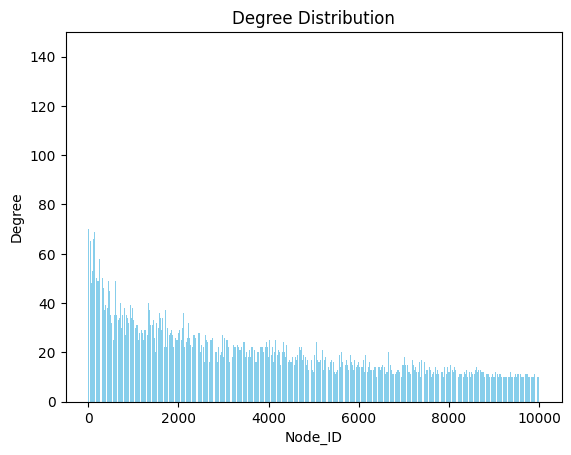

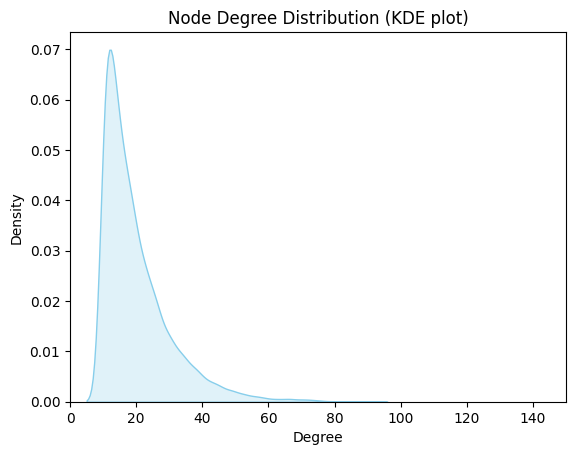

Max Degree: 91
Min Degree: 10
Average Degree: 19.989
Standard Deviation of Degree Distribution: 10.457380871014891
Total number of Nodes in the graph: 10000
Total number of Edges in the graph: 99945
Dataset-1 Giant component size: 4941
Dataset-1 Giant component number of nodes: 4941
Dataset-1 Giant component number of edges: 6594


KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>

In [350]:
# Main function
if __name__ == "__main__":
    # Load datasets
    dataset1_path = "D:\SNA_project\SNA_project\download.tsv.opsahl-powergrid\opsahl-powergrid\out.opsahl-powergrid"
    dataset2_path = "D:\SNA_project\SNA_project\download.tsv.moreno_propro\moreno_propro\out.moreno_propro_propro"
    G1 = load_Undirected_Graph(dataset1_path)
    G2 = load_Undirected_Graph(dataset2_path)
    G3_BA = generate_BA_network()
    #visualize_BA_network(G3_BA)

    # nx.draw_networkx_edges(G1, pos=nx.spring_layout(G1))
    # plt.savefig('powergrid.png')
    
    # nx.draw_networkx_edges(G2, pos=nx.spring_layout(G2))
    # plt.savefig('yeast.png')

    # Summarize network statistics
    # print("Dataset 1 Statistics:")
    # summarize_network_stats(G1)
    # print("\nDataset 2 Statistics:")
    # summarize_network_stats(G2)
    print("\nGraph-3(BA_model) Statistics:")
    summarize_network_stats(G3_BA)

    # #Giant Components
    G1_Giant_component_size = calculate_giant_component_size(G1)
    G2_Giant_component_size = calculate_giant_component_size(G2)
    G3_BA_Giant_component_size = calculate_giant_component_size(G3_BA)

    G1_Giant_component = calculate_giant_component(G1)
    G2_Giant_component = calculate_giant_component(G2)
    G3_BA_Giant_component = calculate_giant_component(G3_BA)

    print(f"Dataset-1 Giant component size: {G1_Giant_component_size}")
    print(f"Dataset-1 Giant component number of nodes: {G1_Giant_component.number_of_nodes()}")
    print(f"Dataset-1 Giant component number of edges: {G1_Giant_component.number_of_edges()}")
    visualize_giant_component(G1_Giant_component, "Dataset1")

    print(f"Dataset-2 Giant component size: {G2_Giant_component_size}")
    print(f"Dataset-2 Giant component number of nodes: {G2_Giant_component.number_of_nodes()}")
    print(f"Dataset-2 Giant component number of edges: {G2_Giant_component.number_of_edges()}")
    visualize_giant_component(G2_Giant_component, "Dataset2")

    print(f"BA-Model Giant component size: {G3_BA_Giant_component_size}")
    print(f"BA-Model Giant component number of nodes: {G3_BA_Giant_component.number_of_nodes()}")
    print(f"BA-Model Giant component number of edges: {G3_BA_Giant_component.number_of_edges()}")
    visualize_giant_component(G3_BA_Giant_component, "Barabasi-Albert Network")


    # #Information Diffusion
    initialize_activation_probabilities(G1)
    visualize_activation_probabilities(G1)
    G1_ICM = independent_cascade_model(G1)
    print(f"Average nuumber of steps required to diffuse information for dataset 1: {G1_ICM}")

    initialize_activation_probabilities(G2)
    visualize_activation_probabilities(G2)
    G2_ICM = independent_cascade_model(G2)
    print(f"Average nuumber of steps required to diffuse information for dataset 2: {G2_ICM}")

    initialize_activation_probabilities(G3_BA)
    visualize_activation_probabilities(G3_BA)
    G3_ICM = independent_cascade_model(G3_BA)
    print(f"Average nuumber of steps required to diffuse information for Network 3(BA_model): {G3_ICM}")

    #Calculate centrality measures
    # print("Dataset 1 centrality measures:")
    # centrality_measures_1 = calculate_centrality_measures(G1)
    # centrality_stats1 = centrality_measures_1.describe()
    # # Plot heatmap
    # plt.figure(figsize=(10, 6))
    # sns.heatmap(centrality_stats1, annot=True, fmt=".2f", cmap="YlGnBu")
    # plt.title("Descriptive Statistics of Centrality Measures for Network-1")
    # plt.show()
    # get_top_10_values(centrality_measures_1)

    # print("\nDataset 2 centrality measures:")
    # centrality_measures_2 = calculate_centrality_measures(G2)
    # centrality_stats2 = centrality_measures_2.describe()
    # # Plot heatmap
    # plt.figure(figsize=(10, 6))
    # sns.heatmap(centrality_stats2, annot=True, fmt=".2f", cmap="YlGnBu")
    # plt.title("Descriptive Statistics of Centrality Measures for Network-2")
    # plt.show()
    # get_top_10_values(centrality_measures_2)

    
    print("\nBA Graph centrality measures:")
    centrality_measures_3 = calculate_centrality_measures(G3_BA)
    centrality_stats3 = centrality_measures_3.describe()
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(centrality_stats3, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Descriptive Statistics of Centrality Measures for Network-3(BA model)")
    plt.show()
    get_top_10_values(centrality_measures_3)